# Traffic Detection with YOLOv8
In this notebok, we will explore the field of object detection by implementing a general traffic detection algorithm using YOLOv8. Our dataset is sourced from the Kaggle dataset titled "Traffic Detection Project", available at https://www.kaggle.com/datasets/yusufberksardoan/traffic-detection-project/data


## Dataset Overview
The "Traffic Detection Project" dataset provides a collection of over 6600 images annotated with bounding boxes around cars, pedestrians, bikes, motorcycles etc. Fortunately, the original data is already in YOLO's compatible format, so there is nothing to change in it.

In order to implement this project, it will be neccessary to:

Load and preprocess the dataset.

Customize the configuration based on the dataset characteristics.

Fine-tune the YOLOv8 model on the dataset.

Monitor training progress and evaluate the model's performance.

Analyze the results, visualize detection outputs, and assess the model's accuracy.

## Setup and Dependencies

> The os module provides a way of interacting with the operating system. In this context, it will be used for handling file paths and directory operations.

> Matplotlib is a popular data visualization library. The pyplot module provides a convenient interface for creating plots and charts. The patches module within matplotlib is used for drawing shapes on plots. It will be used for visualizing bounding boxes.

> Ultralytics is a library that includes the YOLO (You Only Look Once) object detection model. It likely provides convenient tools for training, evaluating, and using YOLO models.

> Drive is part of the Google Colab library and is used to mount Google Drive into the Colab environment. This allows you to access and store files in your Google Drive.

In [2]:
pip install ultralytics -q

In [3]:
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from ultralytics import YOLO

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First, we should define the main paths for our files

In [4]:
PATH = '/content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection'
train_images = f'{PATH}/train/images'
valid_images = f'{PATH}/valid/images'
test_images = f'{PATH}/test/images'

len(os.listdir(train_images)), len(os.listdir(valid_images)), len(os.listdir(test_images))

(5805, 549, 279)

Here are some samples of pictures on the test dataset.

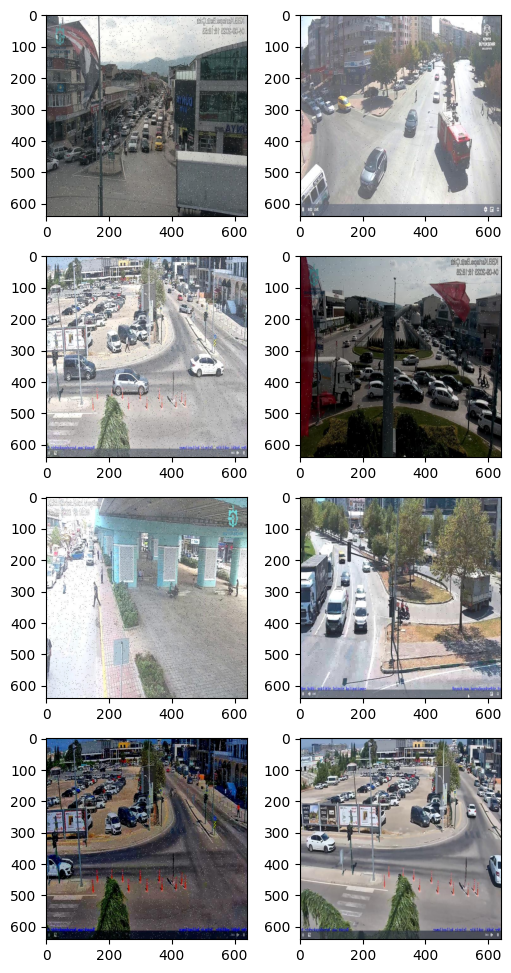

In [5]:
fig, ax = plt.subplots(4, 2, figsize=(6, 12))
for i, image in enumerate(os.listdir(train_images)[:8]):
    img = plt.imread(f'{train_images}/{image}')
    ax[i//2, i%2].imshow(img)
plt.show()

YOLOv8 can be seamlessly integrated and used directly within a Python environment, thanks to the library and dependencies imported in the initial setup. In this project, we opt for the utilization of a pre-trained YOLOv8 model. Pre-trained models are trained on large-scale datasets and can effectively generalize across a wide range of object categories, making them a powerful starting point for various applications.

In [6]:
model = YOLO("yolov8n.pt")

model.train(data=f'{PATH}/data.yaml', epochs=10, batch=8)
metrics = model.val()

100%|██████████| 6.25M/6.25M [00:00<00:00, 109MB/s]


Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_con

100%|██████████| 755k/755k [00:00<00:00, 21.7MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/train/labels.cache... 5805 images, 93 backgrounds, 0 corrupt: 100%|██████████| 5805/5805 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       1.3G       1.38      1.577      1.108         46        640: 100%|██████████| 726/726 [21:02<00:00,  1.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.95it/s]

                   all        549       6270      0.715      0.639      0.696      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10       1.3G      1.267       1.03      1.054        103        640: 100%|██████████| 726/726 [02:58<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.36it/s]


                   all        549       6270      0.774      0.674      0.753       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10       1.3G      1.222     0.9041      1.038         42        640: 100%|██████████| 726/726 [02:58<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:09<00:00,  3.66it/s]


                   all        549       6270      0.795      0.715      0.787      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       1.3G      1.189     0.8311      1.022         53        640: 100%|██████████| 726/726 [02:53<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.09it/s]


                   all        549       6270      0.828      0.735      0.809      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       1.3G      1.145     0.7625      1.006         54        640: 100%|██████████| 726/726 [02:54<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.45it/s]


                   all        549       6270      0.816      0.756      0.834      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.28G      1.122     0.7266     0.9948         44        640: 100%|██████████| 726/726 [02:54<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.37it/s]

                   all        549       6270      0.847      0.779      0.846      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.33G      1.091     0.6875     0.9836         51        640: 100%|██████████| 726/726 [02:54<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.29it/s]


                   all        549       6270      0.862      0.796      0.864      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.29G      1.062     0.6572     0.9715         61        640: 100%|██████████| 726/726 [02:56<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.71it/s]


                   all        549       6270      0.875      0.796      0.875      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.28G      1.033     0.6253     0.9604         47        640: 100%|██████████| 726/726 [03:00<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:07<00:00,  4.47it/s]

                   all        549       6270      0.869      0.808      0.877      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.31G      1.011     0.6031     0.9526         57        640: 100%|██████████| 726/726 [02:58<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]


                   all        549       6270      0.897      0.804      0.888      0.634

10 epochs completed in 0.822 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:19<00:00,  1.79it/s]


                   all        549       6270      0.897      0.804      0.888      0.634
               bicycle        189        250      0.928      0.823      0.888      0.673
                   bus         81        108      0.945      0.898      0.952      0.806
                   car        520       3842       0.89      0.912      0.957      0.734
             motorbike        331       1238      0.914      0.733      0.855      0.527
                person        196        832      0.807      0.653      0.785      0.427
Speed: 0.9ms preprocess, 4.5ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100%|██████████| 549/549 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 69/69 [00:16<00:00,  4.19it/s]


                   all        549       6270       0.89      0.809      0.889      0.634
               bicycle        189        250      0.927      0.824      0.889      0.672
                   bus         81        108      0.939      0.898      0.952      0.809
                   car        520       3842      0.885      0.915      0.956      0.735
             motorbike        331       1238      0.908      0.738      0.857      0.527
                person        196        832      0.792      0.667      0.789      0.427
Speed: 0.6ms preprocess, 5.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train2


Let's make some predictions for the test dataset.

In [7]:
results = model.predict(f"{PATH}/test/images/", save=True)


image 1/279 /content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 20 cars, 2 motorbikes, 1 person, 7.5ms
image 2/279 /content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 17 cars, 6 motorbikes, 10.6ms
image 3/279 /content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg: 640x640 1 bicycle, 16 cars, 3 motorbikes, 19.7ms
image 4/279 /content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg: 640x640 12 cars, 4 motorbikes, 28.6ms
image 5/279 /content/drive/MyDrive/Introdução à Aprendizagem Profunda/CNN/Traffic Detection/test/images/aguanambi-154

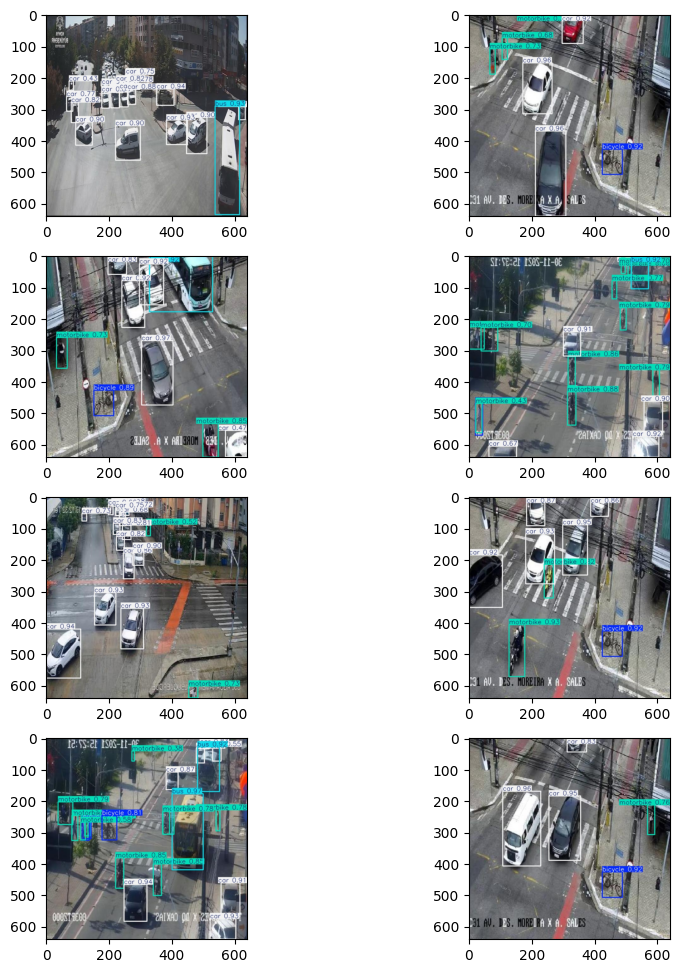

In [8]:
result_path = '/content/runs/detect/train3'
fig, ax = plt.subplots(4, 2, figsize=(10, 12))
for i, image in enumerate(os.listdir(result_path)[:8]):
    img = plt.imread(f'{result_path}/{image}')
    ax[i//2, i%2].imshow(img)
plt.show()